In [1]:
# GENERAL LIBRAIRIES IMPORT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# OWN LIBRAIRY IMPORT
from basic_sl import synthetise

In [3]:
# DATA IMPORT
netflix = pd.read_csv('../data/Netflix.csv')
netflix.drop('Unnamed: 0', axis = 1, inplace=True)
netflix.head()

,vote,before_90s,90s,2000s,movie,other,tv movie,video movie,Action,Documentary,...,Thriller,Romance,Other_genre,United States,United Kingdom,France,Other_country,English,Other_language,rating_category
0,-1.565669,0.0,1.0,0.0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,top_10pct
1,-1.565669,0.0,1.0,0.0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,bottom_25pct
2,1.218334,0.0,0.0,1.0,1,0,0,0,0,1,...,0,0,1,1,0,0,0,1,1,bottom_25pct
3,0.174333,0.0,1.0,0.0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,bottom_25pct
4,-1.565669,1.0,0.0,0.0,0,0,0,1,0,1,...,0,0,1,1,0,0,0,1,0,top_10pct


In [4]:
# SKLEARN IMPORTS
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, auc, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [5]:
# DATA PREPARATION

X = netflix.drop('rating_category', axis = 1)
y = netflix.rating_category

# random_state = 42 for reproductibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
VotingClassifier?

Init signature:
VotingClassifier(
    estimators,
    *,
    voting='hard',
    weights=None,
    n_jobs=None,
    flatten_transform=True,
    verbose=False,
)
Docstring:     
Soft Voting/Majority Rule classifier for unfitted estimators.

Read more in the :ref:`User Guide <voting_classifier>`.

.. versionadded:: 0.17

Parameters
----------
estimators : list of (str, estimator) tuples
    Invoking the ``fit`` method on the ``VotingClassifier`` will fit clones
    of those original estimators that will be stored in the class attribute
    ``self.estimators_``. An estimator can be set to ``'drop'``
    using ``set_params``.

    .. versionchanged:: 0.21
        ``'drop'`` is accepted. Using None was deprecated in 0.22 and
        support was removed in 0.24.

voting : {'hard', 'soft'}, default='hard'
    If 'hard', uses predicted class labels for majority rule voting.
    Else if 'soft', predicts the class label based on the argmax of
    the sums of the predicted probabilities, which is 

In [7]:
# VOTING CLASSIFIER

## Naive view: default hyperparameters & all features
### Model fitting

qdc = QuadraticDiscriminantAnalysis()
dtc = DecisionTreeClassifier(random_state=42, max_depth=5)
gnb = GaussianNB()
# voting = 'soft' so to have predict_proba and be able compute roc_auc_score
vc = VotingClassifier(estimators=[('qdc', qdc), ('dtc', dtc), ('gnb', gnb)], voting = 'soft') 
vc.fit(X_train, y_train)

/Users/ericmartinet/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


VotingClassifier(estimators=[('qdc', QuadraticDiscriminantAnalysis()),
                             ('dtc',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=42)),
                             ('gnb', GaussianNB())],
                 voting='soft')

VOTING CLASSIFIER
TRAIN dataset
Accuracy score: 58.8%
Recall score (macro): 58.5%
Precision score (macro): 52.6%
ROC_AUC score (macro): 79.0%
TEST dataset
Accuracy score: 58.9%
Recall score (macro): 56.7%
Precision score (macro): 51.4%
ROC_AUC score (macro): 77.3%




/Users/ericmartinet/Documents/GitHub/Project7_SupervisedLearningNetflix/notebook/basic_sl.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


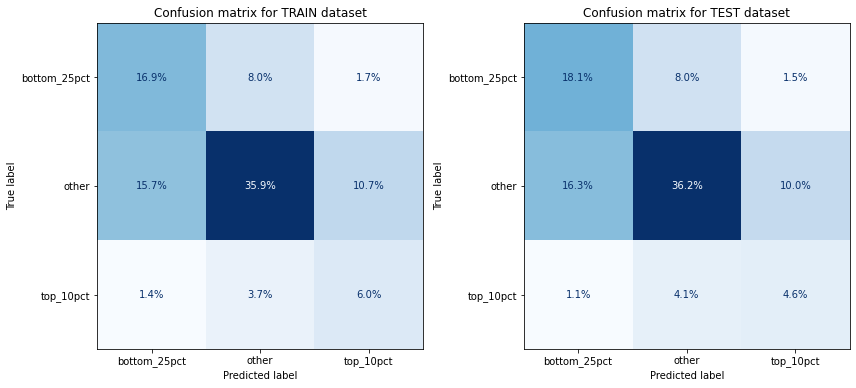

In [8]:
### Synthesis
synthetise(vc, X_train, X_test, y_train, y_test)

In [9]:
### Conclusions
#### Slight overfit but scoring remains relatively good on test.
#### We can use the model with caution.